In [1]:
import tensorflow as tf
import numpy as np
s = tf.InteractiveSession()

Using TensorFlow backend.


(50000, 28, 28) (50000,)


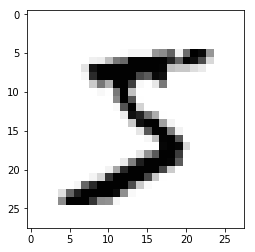

In [2]:
from preprocessed_mnist import load_dataset
X_train_raw, y_train, X_val_raw, y_val, X_test_raw, y_test = load_dataset()
print(X_train_raw.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train_raw[0], cmap="Greys");

In [3]:
print("y [shape - %s]:" % (str(y_train.shape)), y_train[0:5])
print("X [shape - %s]:" % (str(X_train_raw.shape)))

y [shape - (50000,)]: [5 0 4 1 9]
X [shape - (50000, 28, 28)]:


In [4]:
# Flatten (vectorize) the pixels
X_train = np.reshape(X_train_raw,(X_train_raw.shape[0],X_train_raw.shape[1]*X_train_raw.shape[2]))
X_val = np.reshape(X_val_raw,(X_val_raw.shape[0],X_val_raw.shape[1]*X_val_raw.shape[2]))
X_test = np.reshape(X_test_raw,(X_test_raw.shape[0],X_test_raw.shape[1]*X_test_raw.shape[2]))
print("X [shape - %s]:" % (str(X_train.shape)))

X [shape - (50000, 784)]:


In [5]:
# Layer's sizes
x_size = X_train.shape[1] # Number of input nodes: 784 features
h_size = 75 # Number of hidden nodes
y_size = 10 # Number of outcomes (10 digits)

In [6]:
# Model parameters - weights and bias
weights_1 = tf.Variable(tf.random_normal((x_size, h_size),stddev=0.1, dtype='float64'))
b_1 = tf.Variable(tf.random_normal((1, h_size),stddev=0.1, dtype='float64'))
weights_2 = tf.Variable(tf.random_normal((h_size, y_size),stddev=0.1, dtype='float64'))
b_2 = tf.Variable(tf.random_normal((1, y_size),stddev=0.1, dtype='float64'))

In [7]:
# Placeholders for the input data
input_X = tf.placeholder('float64', shape=(None, x_size))
input_y = tf.placeholder('float64', shape=(None,))       

In [8]:
# The model code

# Compute a vector of predictions, resulting shape should be [input_X.shape[0],]
# This is 1D, if you have extra dimensions, you can  get rid of them with tf.squeeze .
# Don't forget the sigmoid.
# predicted_y = <predicted probabilities for input_X>   
yhat_1 = tf.sigmoid(tf.squeeze(tf.add(tf.matmul(input_X,weights_1),b_1)))
yhat_2 = tf.squeeze(tf.add(tf.matmul(yhat_1,weights_2),b_2))   
predicted_y = tf.nn.softmax(yhat_2)
predicted = tf.argmax(predicted_y, axis=1)
# Loss. Should be a scalar number - average loss over all the objects
# tf.reduce_mean is your friend here
# loss = <logistic loss (scalar, mean over sample)>
one_hot = tf.one_hot(tf.cast(input_y, tf.int64), y_size)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot, logits=yhat_2))
#loss = tf.reduce_mean(-tf.log(predicted_y)*input_y - tf.log(1-predicted_y)*(1-input_y))
# See above for an example. tf.train.*Optimizer
# optimizer = <optimizer that minimizes loss>
optimizer = tf.train.MomentumOptimizer(0.01, 0.9, use_nesterov=True).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


In [ ]:
# Run SGD
import matplotlib.pyplot as plt
%matplotlib inline

s.run(tf.global_variables_initializer())
epochs = range(50)
mini_batch_sz = 3
epoch_size = 30
loss_train = np.zeros(epoch_size)
loss_test = np.zeros(epoch_size)
plt.ion()
for epoch in range(epoch_size):
    loss_train[epoch] = s.run(loss, {input_X: X_train, input_y: y_train})
    loss_test[epoch] = s.run(loss, {input_X: X_test, input_y: y_test})    
    for i in range(0, len(X_train), mini_batch_sz):
        j = i + mini_batch_sz
        s.run(optimizer, {input_X: X_train[i:j], input_y: y_train[i:j]})
    train_predicted = s.run(predicted, {input_X: X_train, input_y: y_train})
    train_accuracy = np.mean(y_train == train_predicted)
    test_predicted = s.run(predicted, {input_X: X_test, input_y: y_test})
    test_accuracy  = np.mean(y_test == test_predicted)
    print("\rEpoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy), end="")
plt.plot(epochs, loss_train, label="$train, loss$")
plt.plot(epochs, loss_test, label=r"$test, loss$")
plt.legend()
plt.show()


Epoch = 1, train accuracy = 94.48%, test accuracy = 94.30%